In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("D:\examples\pes2021-all-players_modified.csv")

In [3]:
data.head()

,name,shirt_number,team_name,league,nationality,region,height,weight,age,foot,...,skill_super_sub,com_playing_style_trickster,com_playing_style_mazing_run,com_playing_style_speeding_bullet,com_playing_style_incisive_run,com_playing_style_early_cross,com_playing_style_long_ball_expert,com_playing_style_long_ranger,ball_color,rating_stars
0,L. MESSI,10,FC BARCELONA,Spanish League,ARGENTINA,South America,170,72,33,Left foot,...,0,1,1,1,1,1,0,0,black,5
1,C. RONALDO,7,JUVENTUS,Serie A TIM,PORTUGAL,Europe,187,83,35,Right foot,...,0,1,1,1,1,0,0,1,black,5
2,R. LEWANDOWSKI,9,FC BAYERN MÜNCHEN,Other European Leagues,POLAND,Europe,185,79,32,Right foot,...,0,0,0,0,1,0,0,0,black,5
3,NEYMAR,10,PSG,Ligue 1 Uber Eats,BRAZIL,South America,175,68,28,Right foot,...,0,1,1,1,1,0,0,0,black,5
4,K. DE BRUYNE,17,MANCHESTER B,English League,BELGIUM,Europe,181,68,29,Right foot,...,0,0,1,0,0,1,1,1,black,5


In [11]:
data.loc[:,['name','low_pass','finishing']].to_csv('D:\examples\pes2021-all-players_modified_KMeans.csv')

In [12]:
my_data=pd.read_csv("D:\examples\pes2021-all-players_modified_KMeans.csv")

In [13]:
my_data.head()

,Unnamed: 0,name,low_pass,finishing
0,0,L. MESSI,90,95
1,1,C. RONALDO,83,91
2,2,R. LEWANDOWSKI,73,92
3,3,NEYMAR,89,87
4,4,K. DE BRUYNE,96,83


In [14]:
my_data_2=pd.DataFrame(my_data)

In [15]:
my_data_2=my_data_2.drop('Unnamed: 0', axis=1)

In [16]:
my_data_2.head()

,name,low_pass,finishing
0,L. MESSI,90,95
1,C. RONALDO,83,91
2,R. LEWANDOWSKI,73,92
3,NEYMAR,89,87
4,K. DE BRUYNE,96,83


Text(0, 0.5, 'Finishing')

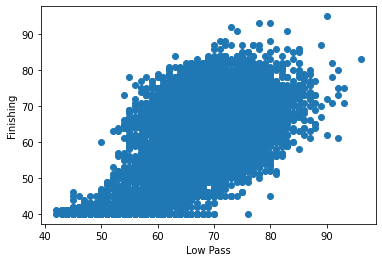

In [17]:
plt.scatter(my_data_2.low_pass,my_data_2.finishing)
plt.xlabel('Low Pass')
plt.ylabel('Finishing')

In [18]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(my_data_2[['low_pass','finishing']])
y_predicted

D:\Programs\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 3, ..., 0, 2, 2])

In [19]:
my_data_2['cluster']=y_predicted
my_data_2.head()

,name,low_pass,finishing,cluster
0,L. MESSI,90,95,1
1,C. RONALDO,83,91,1
2,R. LEWANDOWSKI,73,92,3
3,NEYMAR,89,87,1
4,K. DE BRUYNE,96,83,1


In [20]:
km.cluster_centers_

array([[66.49185947, 56.53076264],
       [75.24852622, 66.46168166],
       [56.98123667, 43.40639659],
       [65.756231  , 70.65227964]])

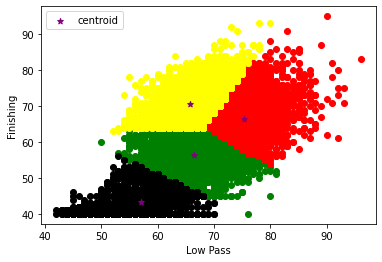

In [21]:
df1 = my_data_2[my_data_2.cluster==0]
df2 = my_data_2[my_data_2.cluster==1]
df3 = my_data_2[my_data_2.cluster==2]
df4 = my_data_2[my_data_2.cluster==3]
plt.scatter(df1.low_pass,df1.finishing,color='green')
plt.scatter(df2.low_pass,df2.finishing,color='red')
plt.scatter(df3.low_pass,df3.finishing,color='black')
plt.scatter(df4.low_pass,df4.finishing,color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Low Pass')
plt.ylabel('Finishing')
plt.legend()

In [23]:
scaler = MinMaxScaler()

scaler.fit(my_data_2[['finishing']])
my_data_2['finishing'] = scaler.transform(my_data_2[['finishing']])

scaler.fit(my_data_2[['low_pass']])
my_data_2['low_pass'] = scaler.transform(my_data_2[['low_pass']])

In [24]:
my_data_2.head()

,name,low_pass,finishing,cluster
0,L. MESSI,0.888889,1.000000,1
1,C. RONALDO,0.759259,0.927273,1
2,R. LEWANDOWSKI,0.574074,0.945455,3
3,NEYMAR,0.870370,0.854545,1
4,K. DE BRUYNE,1.000000,0.781818,1


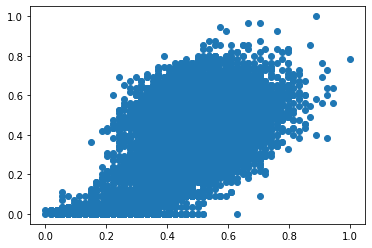

In [25]:
plt.scatter(my_data_2.low_pass,my_data_2.finishing)

In [26]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(my_data_2[['low_pass','finishing']])
y_predicted

D:\Programs\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 2, ..., 3, 0, 0])

In [27]:
my_data_2['cluster']=y_predicted
my_data_2.head()

,name,low_pass,finishing,cluster
0,L. MESSI,0.888889,1.000000,1
1,C. RONALDO,0.759259,0.927273,1
2,R. LEWANDOWSKI,0.574074,0.945455,2
3,NEYMAR,0.870370,0.854545,1
4,K. DE BRUYNE,1.000000,0.781818,1


In [28]:
km.cluster_centers_

array([[0.27663378, 0.06141726],
       [0.61698354, 0.48287775],
       [0.43903549, 0.55489564],
       [0.45318516, 0.30018839]])

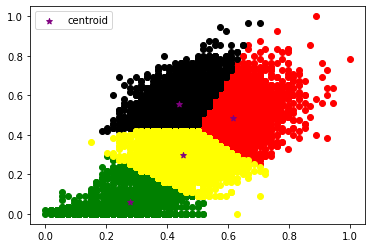

In [29]:
df1 = my_data_2[my_data_2.cluster==0]
df2 = my_data_2[my_data_2.cluster==1]
df3 = my_data_2[my_data_2.cluster==2]
df4 = my_data_2[my_data_2.cluster==3]
plt.scatter(df1.low_pass,df1.finishing,color='green')
plt.scatter(df2.low_pass,df2.finishing,color='red')
plt.scatter(df3.low_pass,df3.finishing,color='black')
plt.scatter(df4.low_pass,df4.finishing,color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [30]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(my_data_2[['low_pass','finishing']])
    sse.append(km.inertia_)

D:\Programs\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Programs\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Programs\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Programs\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

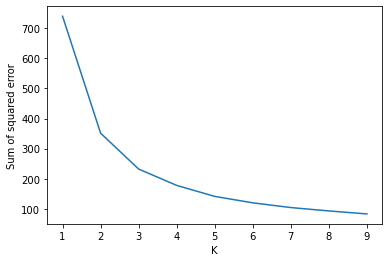

In [31]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)